In [34]:
import pandas as pd

# Reading Data

In [35]:
df = pd.read_csv('data/dropNaN.csv')
df.drop(df.columns[0],axis=1, inplace=True)

In [36]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

x=df[df.columns[:-1]]
y=df['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

### Tree

In [37]:
for i in range(1,10):
  clf = DecisionTreeClassifier(max_depth=i)
  clf = clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  print("Max depth ", i)
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
  print("F1:",metrics.f1_score(y_test, y_pred, average='weighted'))

Max depth  1
Accuracy: 0.6053511705685619
F1: 0.45653567447045706
Max depth  2
Accuracy: 0.6321070234113713
F1: 0.570600491870474
Max depth  3
Accuracy: 0.6287625418060201
F1: 0.5651220581140258
Max depth  4
Accuracy: 0.6279264214046822
F1: 0.5655078320954772
Max depth  5
Accuracy: 0.6354515050167224
F1: 0.5734665844827453
Max depth  6
Accuracy: 0.6321070234113713
F1: 0.5713296581142171
Max depth  7
Accuracy: 0.6354515050167224
F1: 0.5808338408968017
Max depth  8
Accuracy: 0.6312709030100334
F1: 0.582441545649726
Max depth  9
Accuracy: 0.6145484949832776
F1: 0.5779312683027806


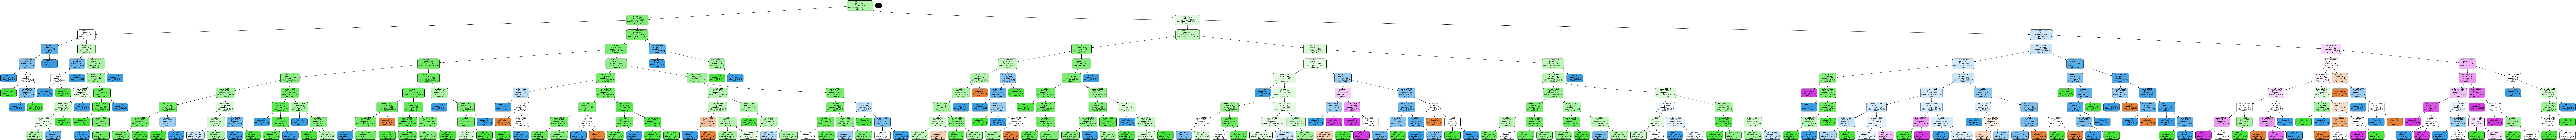

In [38]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = df.columns[:-1],class_names=['N','A','O', '~'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ecg.png')
Image(graph.create_png())

### Random Forest


In [39]:
arr = df.to_numpy()
x = arr[:,:-1]
y = arr[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [40]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10,max_depth=30,bootstrap=True,min_samples_leaf=5, class_weight="balanced")
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.5298885511651469
F1: 0.552510090308594


### XGB

In [41]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x_train, y_train)
# make predictions for test data
y_pred = model.predict(x_test)

In [42]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.6312056737588653
F1: 0.5722345459753291
